# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# define url
#query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | kyaiklat
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | jackson
Processing Record 6 of Set 1 | bluff
City not found. Skipping...
Processing Record 7 of Set 1 | opuwo
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | turki
Processing Record 10 of Set 1 | hami
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | oranjemund
City not found. Skipping...
Processing Record 15 of Set 1 | kristiinankaupunki
Processing Record 16 of Set 1 | zhigansk
Processing Record 17 of Set 1 | tasiilaq
City not found. Skipping...
Processing Record 18 of Set 1 | chimoio
Processing Record 19 of Set 1 | mayo
Processing Record 20 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | neryungri
P

Processing Record 38 of Set 4 | surt
Processing Record 39 of Set 4 | ibra
Processing Record 40 of Set 4 | atasu
Processing Record 41 of Set 4 | mahebourg
City not found. Skipping...
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | hendrina
Processing Record 44 of Set 4 | sorland
Processing Record 45 of Set 4 | vagamo
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | muscat
Processing Record 49 of Set 4 | ouadda
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | mar del plata
City not found. Skipping...
Processing Record 3 of Set 5 | chapais
Processing Record 4 of Set 5 | chantada
Processing Record 5 of Set 5 | marsa matruh
Processing Record 6 of Set 5 | naranjal
Processing Record 7 of Set 5 | hasaki
City not found. Skipping...
Processing Record 8 of Set 5 | virudunagar
Processing Record 9 of Set 5 | warri
Processing Record 10 of Set 5 | tura
Processing Record 11 of Set 5 | ahip

Processing Record 30 of Set 8 | fort-de-france
Processing Record 31 of Set 8 | broome
Processing Record 32 of Set 8 | gilbues
Processing Record 33 of Set 8 | basco
City not found. Skipping...
Processing Record 34 of Set 8 | bonthe
City not found. Skipping...
Processing Record 35 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 36 of Set 8 | xuddur
Processing Record 37 of Set 8 | volga
Processing Record 38 of Set 8 | bharatpur
Processing Record 39 of Set 8 | pathein
Processing Record 40 of Set 8 | manhattan
Processing Record 41 of Set 8 | antalaha
Processing Record 42 of Set 8 | mitchell
Processing Record 43 of Set 8 | meadow lake
Processing Record 44 of Set 8 | gazli
Processing Record 45 of Set 8 | monteria
City not found. Skipping...
Processing Record 46 of Set 8 | deputatskiy
Processing Record 47 of Set 8 | orlik
Processing Record 48 of Set 8 | cidreira
Processing Record 49 of Set 8 | elko
Processing Record 1 of Set 9 | chara
Processing Record 2 of Set 9 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:

# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dict

{'City': ['kyaiklat',
  'ushuaia',
  'albany',
  'busselton',
  'jackson',
  'bluff',
  'opuwo',
  'punta arenas',
  'turki',
  'hami',
  'kapaa',
  'vaini',
  'butaritari',
  'oranjemund',
  'kristiinankaupunki',
  'zhigansk',
  'tasiilaq',
  'chimoio',
  'mayo',
  'puerto ayora',
  'avarua',
  'neryungri',
  'leningradskiy',
  'rikitea',
  'sao jose da coroa grande',
  'benghazi',
  'nikolskoye',
  'barrow',
  'cabo san lucas',
  'san cristobal',
  'hithadhoo',
  'bredasdorp',
  'cajati',
  'hilo',
  'ponta do sol',
  'egvekinot',
  'versalles',
  'castro',
  'mataura',
  'tuktoyaktuk',
  'faya',
  'qaanaaq',
  'barinitas',
  'chuy',
  'odweyne',
  'lisakovsk',
  'svetlogorsk',
  'cape town',
  'shache',
  'inyonga',
  'yellowknife',
  'port alfred',
  'bosaso',
  'longyearbyen',
  'punta de piedra',
  'mys shmidta',
  'chokurdakh',
  'bethel',
  'xunchang',
  'upington',
  'college',
  'codrington',
  'carnarvon',
  'ancud',
  'luau',
  'sinnamary',
  'borovoy',
  'vardo',
  'haines

In [8]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [9]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kyaiklat,76,MM,1579733279,94,16.43,95.73,69.80,3.36
1,ushuaia,75,AR,1579733279,50,-54.80,-68.30,53.60,2.37
2,albany,1,US,1579733279,63,42.60,-73.97,30.20,2.04
3,busselton,76,AU,1579733279,58,-33.65,115.33,64.99,9.75
4,jackson,90,US,1579733135,81,42.42,-122.83,48.00,1.14


In [10]:
weather_dataframe.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [11]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kyaiklat,76,MM,1579733279,94,16.43,95.73,69.80,3.36
1,ushuaia,75,AR,1579733279,50,-54.80,-68.30,53.60,2.37
2,albany,1,US,1579733279,63,42.60,-73.97,30.20,2.04
3,busselton,76,AU,1579733279,58,-33.65,115.33,64.99,9.75
4,jackson,90,US,1579733135,81,42.42,-122.83,48.00,1.14


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [23]:
time.strftime('%x')

'01/22/20'

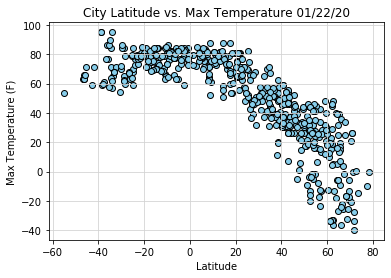

In [24]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

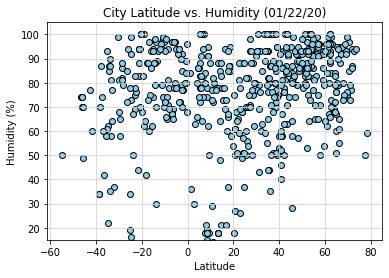

In [26]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

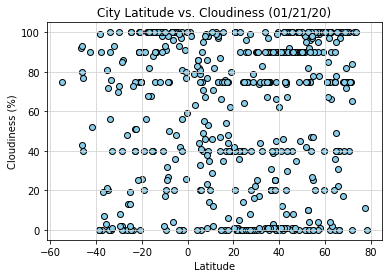

In [27]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

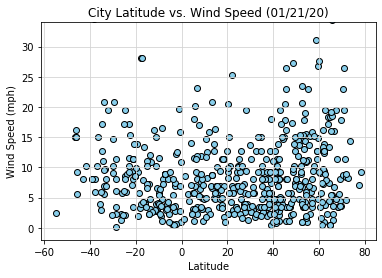

In [28]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values*slope + intercept
    line_eq = 'y= '+ str(round(slope,2)) + 'x + ' +str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.xlabel('Lattitude')
    plt.ylabel(title)
    print(f'The r-squared is: {rvalue}')
    plt.show()
    

In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


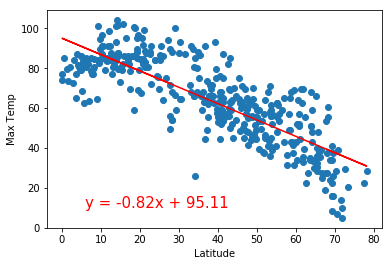

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


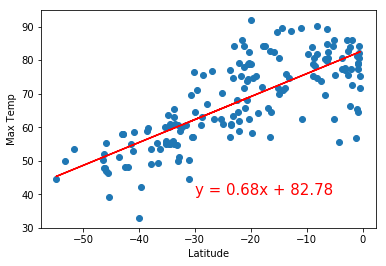

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


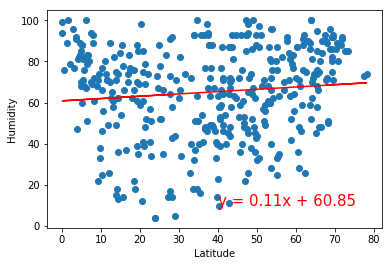

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


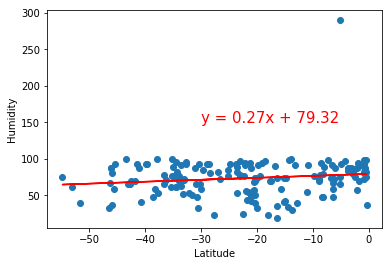

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


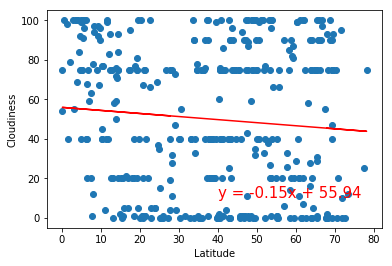

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


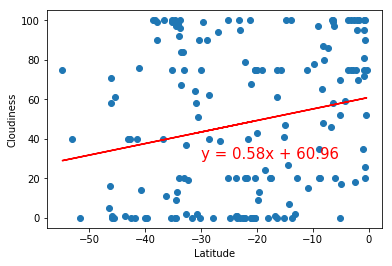

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


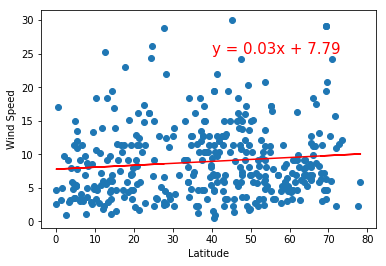

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


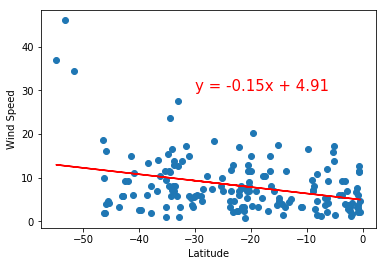